In [1122]:
#Importing necessary libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1123]:
df = pd.read_excel("C:/Users/ROMIK456/OneDrive/MFR/Merged_MFR_Data.xlsx", skiprows = 1, header = 0)
zips = pd.read_excel("I:/CUP COMPLIANCE/CUP Query/CUP Query 2024/Summary 2024.xlsx", sheet_name = 'Detailed data', skiprows = 10, header = 0)

df.columns

Index(['Entity', 'Address', 'Community Type', 'AYB', 'EYB',
       'Number of Potable Meters', 'ADF GPD', 'GPDw', 'GPDr', 'GPDi',
       'WW Rate', 'OUC Chilled Water', 'Irrigation Meter', 'Meter Set Up',
       'Units', 'GPUD', 'Studio', '1BR', '2BR', '3+BR', 'CUSTOMER TYPE',
       'ACCT ID', 'SA ID', 'SA TYPE CD', 'PREM ID', 'BADGE NBR', 'MTR SIZE',
       'JAN KGAL', 'FEB KGAL', 'MAR KGAL', 'APR KGAL', 'MAY 2024 KGAL',
       'JUN 2024 KGAL', 'JUL 2024 KGAL', 'AUG 2024 KGAL', 'SEP 2024 KGAL',
       'OCT 2024 KGAL', 'NOV 2024 KGAL', 'DEC 2024 KGAL', 'Unnamed: 39',
       'Unnamed: 40'],
      dtype='object')

In [1124]:
zips.columns

Index(['SP ID', 'CUSTOMER TYPE', 'ACCT ID', 'ENTITY NAME', 'SA ID',
       'SA TYPE CD', 'SA START DATE', 'ADDRESS1', 'ADDRESS2', 'CITY', 'POSTAL',
       'PREM TYPE CD', 'PREM ID', 'PREM SUB', 'INSTALL DATE', 'SP TYPE CD',
       'IRRI ACRE', 'RATE CODE', 'WATER TYPE', 'BADGE NBR', 'MTR SIZE',
       'ADF GPD', 'EPETS WO', 'KGAL 2024', 'JAN 2024 KGAL', 'FEB 2024 KGAL',
       'MAR 2024 KGAL', 'APR 2024 KGAL', 'MAY 2024 KGAL', 'JUN 2024 KGAL',
       'JUL 2024 KGAL', 'AUG 2024 KGAL', 'SEP 2024 KGAL', 'OCT 2024 KGAL',
       'NOV 2024 KGAL', 'DEC 2024 KGAL'],
      dtype='object')

In [1125]:
df = df.dropna(subset = ['AYB'])
df = df.dropna(subset = ['GPUD'])
df= df.dropna(subset = ['EYB'])

In [1126]:
df = df.merge(zips[['PREM ID', 'POSTAL']], on = 'PREM ID', how = 'left')
df = df.rename(columns = {'POSTAL': 'Zip Code'})

In [1127]:
df.columns

Index(['Entity', 'Address', 'Community Type', 'AYB', 'EYB',
       'Number of Potable Meters', 'ADF GPD', 'GPDw', 'GPDr', 'GPDi',
       'WW Rate', 'OUC Chilled Water', 'Irrigation Meter', 'Meter Set Up',
       'Units', 'GPUD', 'Studio', '1BR', '2BR', '3+BR', 'CUSTOMER TYPE',
       'ACCT ID', 'SA ID', 'SA TYPE CD', 'PREM ID', 'BADGE NBR', 'MTR SIZE',
       'JAN KGAL', 'FEB KGAL', 'MAR KGAL', 'APR KGAL', 'MAY 2024 KGAL',
       'JUN 2024 KGAL', 'JUL 2024 KGAL', 'AUG 2024 KGAL', 'SEP 2024 KGAL',
       'OCT 2024 KGAL', 'NOV 2024 KGAL', 'DEC 2024 KGAL', 'Unnamed: 39',
       'Unnamed: 40', 'Zip Code'],
      dtype='object')

In [1128]:
#Dropping excess data.
columns_to_drop = ['Entity', 'CUSTOMER TYPE', 'ACCT ID', 'SA ID', 'SA TYPE CD', 'PREM ID', 'BADGE NBR', 'MTR SIZE', 'JAN KGAL', 'FEB KGAL', 'MAR KGAL', 
                   'APR KGAL', 'MAY 2024 KGAL', 'JUN 2024 KGAL', 'JUL 2024 KGAL', 'AUG 2024 KGAL', 'SEP 2024 KGAL', 'OCT 2024 KGAL', 'NOV 2024 KGAL', 
                   'DEC 2024 KGAL', 'Unnamed: 39', 'Unnamed: 40']
df = df.drop(columns = columns_to_drop)

In [1129]:
df.loc[
    (df['Units'] != df['Number of Potable Meters']) & (df['Meter Set Up'] == 'individual'),
    'GPUD'
] = df['GPDw'] / df['Units']

In [1130]:
columns_to_drop = ['Number of Potable Meters']
df = df.drop(columns = columns_to_drop)

In [1131]:
df.isna().sum()

Address                0
Community Type         4
AYB                    0
EYB                    0
ADF GPD                0
GPDw                   0
GPDr                 496
GPDi                 371
WW Rate                0
OUC Chilled Water      0
Irrigation Meter       0
Meter Set Up           0
Units                  0
GPUD                   0
Studio               323
1BR                  322
2BR                  322
3+BR                 322
Zip Code              23
dtype: int64

In [1132]:
df['Irrigation Meter'].unique()

array(['No', 'Reclaim', 'Potable', 'Potable - not in use',
       'Reclaim - not in use', 'Reclaim - Individual', 'no'], dtype=object)

In [1133]:
#Normalizing irrigation meter data.
df['Irrigation Meter'] = df['Irrigation Meter'].replace({
    'Reclaim - not in use': 'No',
    'Potable - not in use': 'No',
    'no': 'No',
    'Potable': 'Yes',
    'Recalim': 'Yes',
    'Reclaim - Individual': 'Yes'
})

In [1134]:
df['Meter Set Up'].unique()

array(['Master', 'Individual', 'Meter per building', 'Meter per street',
       'Meter per Building', 'Meter per block', 'Mixed'], dtype=object)

In [1135]:
#Normalizing meter set up data.
df['Meter Set Up'] = df['Meter Set Up'].replace({
    'Master. Previously Individual': 'Master',
    'Meter per Building': 'Meter per building',
    'Master. Individual privately': 'Master',
    'master': 'Master'})

df['Meter Set Up'].value_counts(dropna=False)

Meter Set Up
Master                314
Individual            138
Meter per building     58
Mixed                   6
Meter per street        5
Meter per block         3
Name: count, dtype: int64

In [1136]:
# Modify the original DataFrame in place
df = df[~df['Meter Set Up'].isin(['Mixed', 'Meter per block', 'Meter per street']) & df['Meter Set Up'].notna()]

In [1137]:
# Normalize wastewater rates.
df['WW Rate'] = df['WW Rate'].apply(
    lambda x: 'Flat' if 'FLT' in str(x)
    else 'No Sewer' if str(x).strip().lower() == 'no sewer'
    else 'Other'
)

In [1138]:
df.dtypes

Address               object
Community Type        object
AYB                  float64
EYB                  float64
ADF GPD              float64
GPDw                 float64
GPDr                  object
GPDi                 float64
WW Rate               object
OUC Chilled Water     object
Irrigation Meter      object
Meter Set Up          object
Units                float64
GPUD                 float64
Studio                object
1BR                  float64
2BR                  float64
3+BR                 float64
Zip Code              object
dtype: object

In [1139]:
columns_to_convert = ['GPDr', 'Studio', 'Zip Code']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Converts invalid values to NaN

In [1140]:
#Dropping rows with GPUD quantities that are likely errors.
df = df[df['GPUD'] >= 40]

In [1141]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Load your data (filtered to missing zips)
missing_zips = df[df['Zip Code'].isna()].copy()
missing_zips['full_address'] = missing_zips['Address'] + ', Orlando, FL'

# Set up geocoder
geolocator = Nominatim(user_agent="zip_lookup")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Geocode
missing_zips['location'] = missing_zips['full_address'].apply(geocode)
missing_zips['Zip Code'] = missing_zips['location'].apply(
    lambda loc: loc.raw.get('address', {}).get('postcode') if loc else None
)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('120 E MILLER ST, Orlando, FL',), **{}).
Traceback (most recent call last):
  File "C:\Users\ROMIK456\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connectionpool.py", line 536, in _make_request
    response = conn.getresponse()
               ^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROMIK456\AppData\Local\Programs\Python\Python312\Lib\site-packages\urllib3\connection.py", line 464, in getresponse
    httplib_response = super().getresponse()
                       ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROMIK456\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 1428, in getresponse
    response.begin()
  File "C:\Users\ROMIK456\AppData\Local\Programs\Python\Python312\Lib\http\client.py", line 331, in begin
    version, status, reason = self._read_status()
                              ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ROMIK456\AppData\Local\Programs\Python\Python312\Lib\http\client.py", l

In [1142]:
df['Zip Code'].unique()

array([32801., 32814.,    nan, 32806., 32808., 32827., 32839., 32818.,
       32824., 32804., 32811., 32807., 32819., 32836., 32812., 32832.,
       32837., 32835., 32822., 32805., 32803., 32809.])

In [1143]:
# Strip whitespace and trailing periods
df['Zip Code'] = df['Zip Code'].astype(str).str.strip().str.replace('.', '', regex=False)

In [1144]:
df = df.dropna(subset = ['Zip Code'])
df = df[df['Zip Code'].astype(str).str.lower() != 'nan']

In [1145]:
df['Zip Code'].unique()

array(['328010', '328140', '328060', '328080', '328270', '328390',
       '328180', '328240', '328040', '328110', '328070', '328190',
       '328360', '328120', '328320', '328370', '328350', '328220',
       '328050', '328030', '328090'], dtype=object)

In [1146]:
df['Zip Code'].dtypes

dtype('O')

In [1147]:
columns_to_convert = ['Zip Code']

for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Converts invalid values to NaN

In [1148]:
df['Zip Code'].unique()

array([328010, 328140, 328060, 328080, 328270, 328390, 328180, 328240,
       328040, 328110, 328070, 328190, 328360, 328120, 328320, 328370,
       328350, 328220, 328050, 328030, 328090])

## Individual Variable Exploration

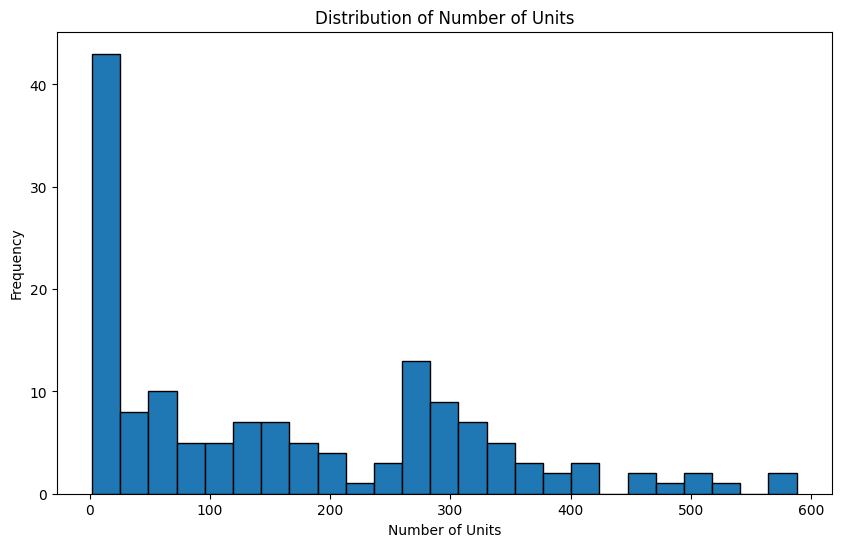

In [1149]:
plt.figure(figsize=(10,6))
plt.hist(df['Units'], bins=25, edgecolor='black')
plt.title('Distribution of Number of Units')
plt.xlabel('Number of Units')
plt.ylabel('Frequency')
plt.show()

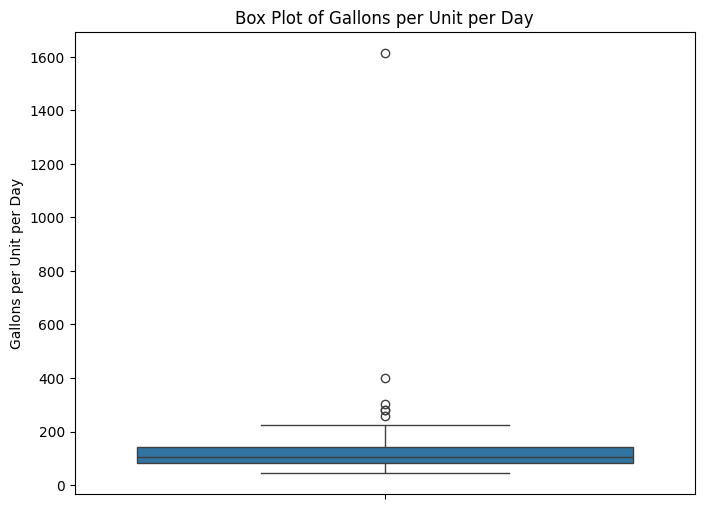

In [1150]:
#Changed from histogram for Milestone 2 to better visualize outliers now that data is more complete.
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['GPUD'])

plt.title('Box Plot of Gallons per Unit per Day')
plt.ylabel('Gallons per Unit per Day')

plt.show()

In [1151]:
#Removing GPUD outliers using the IQR method.
Q1 = df['GPUD'].quantile(0.25)
Q3 = df['GPUD'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['GPUD'] >= lower_bound) & (df['GPUD'] <= upper_bound)]

In [1152]:
df

,Address,Community Type,AYB,EYB,ADF GPD,GPDw,GPDr,GPDi,WW Rate,OUC Chilled Water,Irrigation Meter,Meter Set Up,Units,GPUD,Studio,1BR,2BR,3+BR,Zip Code
0,101 S EOLA DR,Apartment,2008.00,2008.00,297.55,9918.45,NaN,NaN,Other,Yes,No,Master,144.00,68.88,0.00,96.00,48.00,0.00,328010
1,101 S EOLA DR,Apartment,2008.00,2008.00,297.55,9918.45,NaN,NaN,Other,Yes,No,Master,144.00,68.88,0.00,96.00,48.00,0.00,328010
2,101 S EOLA DR,Apartment,2008.00,2008.00,297.55,9918.45,NaN,NaN,Other,Yes,No,Master,144.00,68.88,0.00,96.00,48.00,0.00,328010
3,1500 LAKE BALDWIN LN,Townhome,2006.00,2006.00,43.38,1445.85,NaN,NaN,Other,No,No,Individual,16.00,90.37,0.00,0.00,0.00,16.00,328140
17,38 W HARDING ST,Townhome,2023.00,2023.00,30.66,1022.03,NaN,42.20,Other,No,Yes,Individual,23.00,44.44,0.00,0.00,0.00,23.00,328060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,7020 STONEHEDGE DR,Townhome,2000.00,2000.00,348.41,11613.75,NaN,187.91,Other,No,Yes,Individual,170.00,68.32,0.00,0.00,34.00,136.00,328190
503,9307 AVELLINO AVE,Apartment,2015.00,2016.00,1020.33,34011.06,NaN,NaN,Other,No,No,Master,335.00,101.53,NaN,NaN,NaN,NaN,328190
514,4502 LIGHTHOUSE CIR,Apartment,1983.00,1983.00,498.14,16604.50,NaN,1758.33,Other,No,Yes,Individual,124.00,133.91,0.00,0.00,124.00,0.00,328080
517,3242 VILLA STRADA WAY,Townhome,2007.00,2007.00,692.20,23073.46,NaN,NaN,Other,No,No,Individual,141.00,163.64,0.00,0.00,0.00,141.00,328350


In [1153]:
df.isna().sum()

Address                0
Community Type         0
AYB                    0
EYB                    0
ADF GPD                0
GPDw                   0
GPDr                 124
GPDi                  86
WW Rate                0
OUC Chilled Water      0
Irrigation Meter       0
Meter Set Up           0
Units                  0
GPUD                   0
Studio                62
1BR                   61
2BR                   61
3+BR                  60
Zip Code               0
dtype: int64

In [1154]:
df = df.dropna(subset = ['Community Type'])

## Year Built vs GPUD

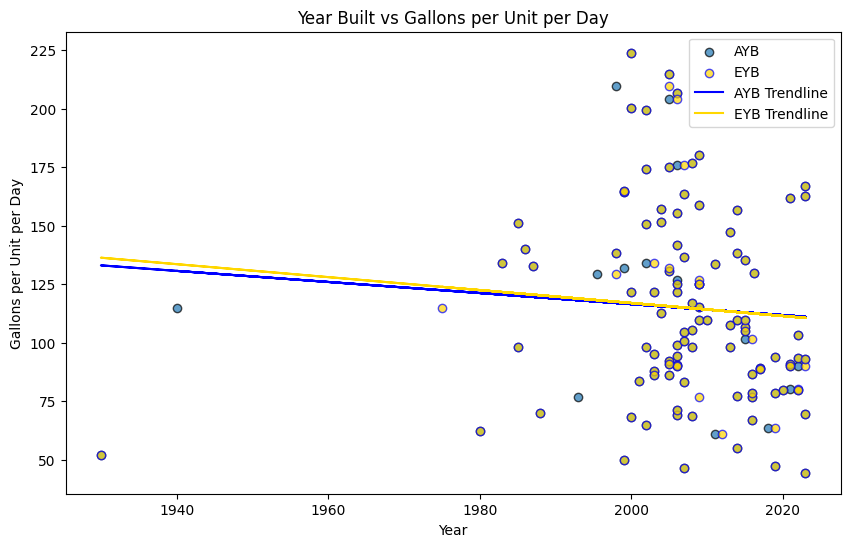

In [1170]:
plt.figure(figsize=(10, 6))

# Scatter plot for AYB
plt.scatter(df['AYB'], df['GPUD'], alpha=0.7, edgecolors='black', label='AYB')

# Scatter plot for EYB
plt.scatter(df['EYB'], df['GPUD'], color='gold', alpha=0.7, edgecolors='blue', label='EYB')

# Fit trendline for AYB
coeff_ayb = np.polyfit(df['AYB'], df['GPUD'], 1)
trend_ayb = np.polyval(coeff_ayb, df['AYB'])
plt.plot(df['AYB'], trend_ayb, color='blue', label='AYB Trendline')

# Fit trendline for EYB
coeff_eyb = np.polyfit(df['EYB'], df['GPUD'], 1)
trend_eyb = np.polyval(coeff_eyb, df['EYB'])
plt.plot(df['EYB'], trend_eyb, color='gold', label='EYB Trendline')

# Add titles and labels
plt.title('Year Built vs Gallons per Unit per Day')
plt.xlabel('Year')
plt.ylabel('Gallons per Unit per Day')
plt.legend()

# Show the plot
plt.show()

In [1171]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split

#Creating a DF that has the selected features.
model_df = df[['AYB', 'EYB', 'WW Rate', 'Irrigation Meter', 'Meter Set Up', 'GPUD', 'Zip Code']]

X = model_df[['AYB', 'EYB', 'WW Rate', 'Irrigation Meter', 'Meter Set Up', 'Zip Code']]  # Replace with actual factor names
y = model_df['GPUD']

# Encode string column.
categorical_cols = X.select_dtypes(include = ['object', 'string']).columns
X = pd.get_dummies(X, columns = categorical_cols)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)  # This will rank models based on performance

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:00<00:00, 43.09it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58
[LightGBM] [Info] Number of data points in the train set: 90, number of used features: 3
[LightGBM] [Info] Start training from score 116.716182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

## LightGBM Regressor Model

In [1172]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [1173]:
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66
[LightGBM] [Info] Number of data points in the train set: 90, number of used features: 7
[LightGBM] [Info] Start training from score 116.716182
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMRegressor(random_state=42)

In [1174]:
y_pred = model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 1601.98
R² Score: 0.20


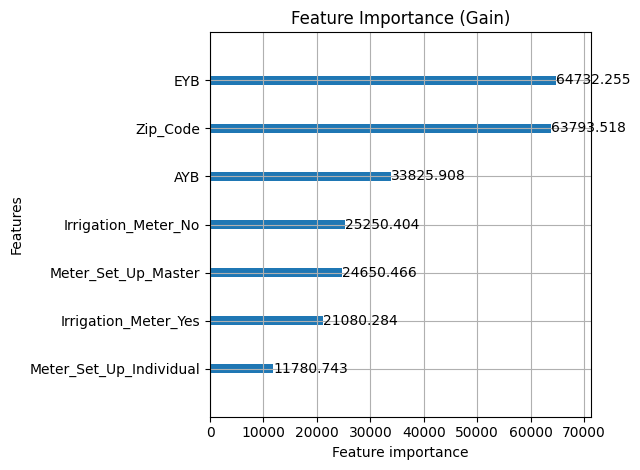

In [1175]:
import lightgbm as lgb

lgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.title("Feature Importance (Gain)")
plt.tight_layout()
plt.show()

In [1176]:
import geopandas as gpd

# Load GeoJSON
zip_shapes = gpd.read_file("C:/Users/ROMIK456/OneDrive/MFR/fl_florida_zip_codes_geo.min.json")

zip_shapes.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,12,32606,1232606,B5,G6350,S,44273265,253128,+29.6820042,-082.4440962,N,"POLYGON ((-82.3799 29.67955, -82.38003 29.6795..."
1,12,32609,1232609,B5,G6350,S,290843169,6376578,+29.7689903,-082.2825337,N,"MULTIPOLYGON (((-82.35105 29.7261, -82.35094 2..."
2,12,32612,1232612,B5,G6350,S,2117657,310044,+29.6431195,-082.3538453,N,"MULTIPOLYGON (((-82.3504 29.64489, -82.3504 29..."
3,12,32234,1232234,B5,G6350,S,335454814,1292362,+30.2260009,-081.9835221,N,"POLYGON ((-82.031 30.14228, -82.03132 30.14213..."
4,12,32438,1232438,B5,G6350,S,162751694,964947,+30.5012874,-085.4240809,N,"POLYGON ((-85.35526 30.53368, -85.3541 30.5336..."


In [1178]:
zip_shapes = zip_shapes.rename(columns={'ZCTA5CE10': 'Zip Code'})

In [1180]:
# Ensure both are 5-digit strings
df['Zip Code'] = df['Zip Code'].astype(str).str.extract(r'(\d{5})')
zip_shapes['Zip Code'] = zip_shapes['Zip Code'].astype(str).str.zfill(5)

In [1181]:
print(df['Zip Code'].unique())           # from your GPUD dataset
print(zip_shapes['Zip Code'].unique())   # from your shapefile

['32801' '32814' '32806' '32827' '32808' '32839' '32818' '32824' '32804'
 '32811' '32807' '32819' '32836' '32812' '32832' '32837' '32835' '32822'
 '32805' '32803' '32809']
['32606' '32609' '32612' '32234' '32438' '32656' '32083' '32940' '32951'
 '33069' '33306' '33023' '33009' '32442' '33980' '33950' '33983' '34465'
 '34449' '32068' '32003' '32079' '34120' '34140' '32061' '32223' '32218'
 '32208' '32205' '32266' '32277' '32506' '32137' '32164' '32328' '32324'
 '32330' '34974' '34613' '34609' '34601' '33870' '33603' '33619' '33615'
 '33617' '33569' '33618' '33602' '33596' '33573' '33527' '32440' '32066'
 '34797' '33908' '33931' '33919' '33972' '33922' '33973' '32305' '32399'
 '32303' '32334' '34491' '33469' '33014' '33016' '33175' '33177' '33194'
 '33133' '33145' '33161' '33128' '33165' '33160' '33139' '33001' '32009'
 '32531' '32805' '32803' '32809' '32837' '32836' '32829' '34761' '32812'
 '32814' '32831' '33418' '33432' '33436' '33445' '33417' '33428' '33544'
 '33576' '33709' '33703' 

In [1182]:
merged = zip_shapes.merge(df, on='Zip Code', how='inner')
print(f"Matching ZIPs: {merged.shape[0]}")

Matching ZIPs: 113


In [1183]:
merged

,STATEFP10,Zip Code,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,...,Meter Set Up,Units,GPUD,Studio,1BR,2BR,3+BR,Unit_Group,Estimated_Irrigation_Use,Expected_GPUD
0,12,32805,1232805,B5,G6350,S,17274574,2926179,+28.5299956,-081.4036809,...,Master,307.00,103.29,NaN,NaN,NaN,NaN,301-350,NaN,NaN
1,12,32805,1232805,B5,G6350,S,17274574,2926179,+28.5299956,-081.4036809,...,Individual,22.00,158.86,0.00,0.00,22.00,0.00,1-50,1483.38,137.50
2,12,32805,1232805,B5,G6350,S,17274574,2926179,+28.5299956,-081.4036809,...,Meter per building,20.00,180.25,NaN,NaN,NaN,NaN,1-50,1483.38,NaN
3,12,32805,1232805,B5,G6350,S,17274574,2926179,+28.5299956,-081.4036809,...,Master,64.00,76.85,NaN,NaN,NaN,NaN,51-100,NaN,NaN
4,12,32805,1232805,B5,G6350,S,17274574,2926179,+28.5299956,-081.4036809,...,Master,122.00,126.88,NaN,NaN,NaN,NaN,101-150,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12,32808,1232808,B5,G6350,S,31022709,1782886,+28.5801095,-081.4442995,...,Individual,124.00,133.91,0.00,0.00,124.00,0.00,101-150,NaN,137.50
109,12,32819,1232819,B5,G6350,S,53337933,6455439,+28.4534390,-081.4724217,...,Master,52.00,151.35,0.00,0.00,26.00,26.00,51-100,NaN,151.25
110,12,32819,1232819,B5,G6350,S,53337933,6455439,+28.4534390,-081.4724217,...,Individual,133.00,155.57,0.00,0.00,0.00,133.00,101-150,NaN,165.00
111,12,32819,1232819,B5,G6350,S,53337933,6455439,+28.4534390,-081.4724217,...,Individual,170.00,68.32,0.00,0.00,34.00,136.00,151-200,NaN,159.50


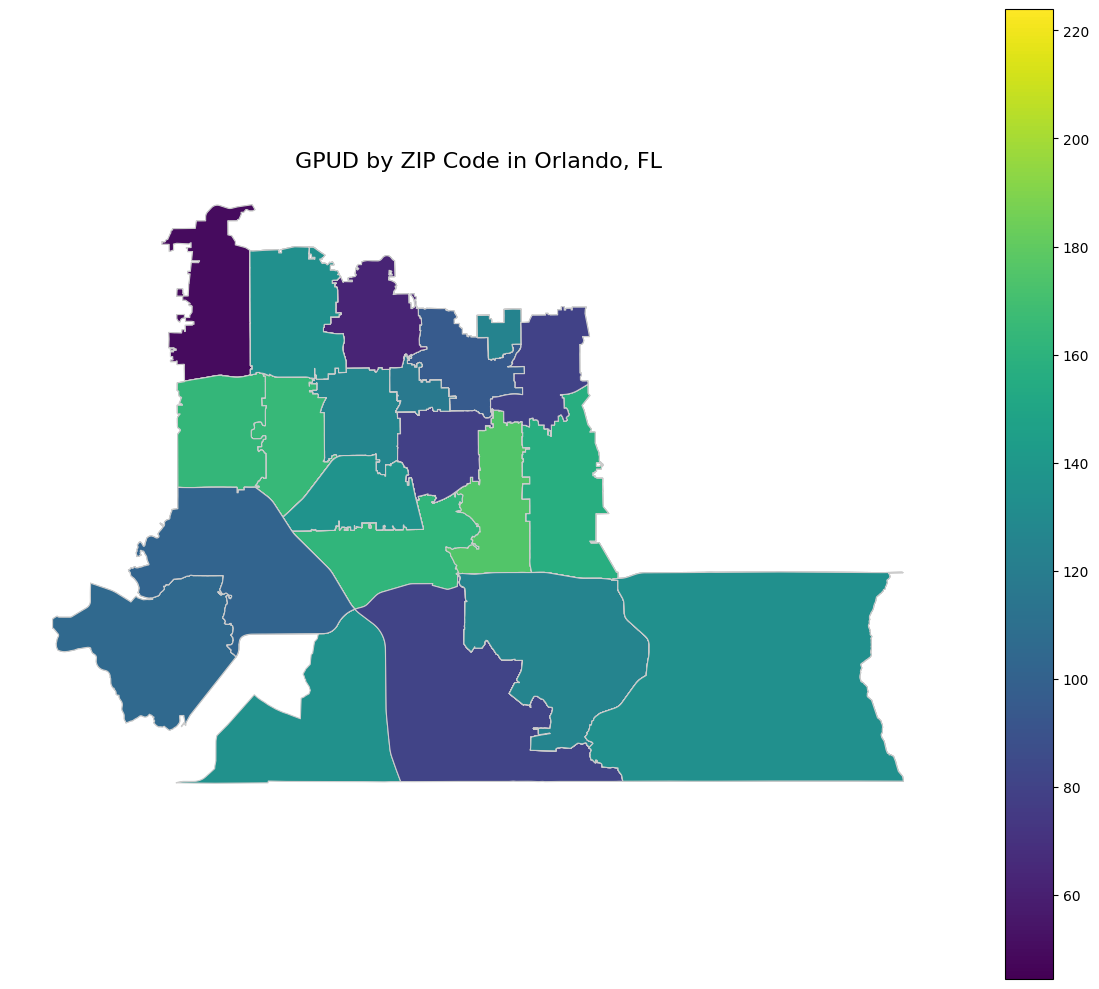

In [1184]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
merged.plot(column='GPUD', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('GPUD by ZIP Code in Orlando, FL', fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
# Grouping by 'Meter Set Up' and calculating the average of 'GPUD'
average_gpud = df.groupby('Meter Set Up')['GPUD'].mean().reset_index()

# Renaming columns for clarity
average_gpud.columns = ['Meter Set Up', 'Average GPUD']

# Displaying the results
average_gpud